**PL 3- Classification**

Classification is a supervised learning type of problem, in which we try to predict a class given a number of features. There are many types of classification methods, in this notebook we will go through:


*   Logistics Regression
*   Linear Discriminant Analysis
*   Quadratic Discriminant Analysis

In [70]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

### Create the datasets

Using the functions make_blobs and make_moons, we could generate datasets with 2 numerical inputs and 2 classes. The functions allows the specification of the location of each set of points, as well as covariance matrices (for normally distributed blobs). The function also allow non-normal distributions.

Below, you will find some datasets generated with this functions.

In [12]:
def plot_classifier_boundary(model,X,h = .05):
  # this function can be used with any sklearn classifier
  # ready for two classes but can be easily extended
  cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
  x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
  y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
  # generate a grid with step h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  # the method ravel flattens xx and yy
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=cmap_light)
  plt.xlim((x_min,x_max))
  plt.ylim((y_min,y_max))

In [ ]:
def subplot_classifier_boundary(model1, model2, model3,X,y,h = .05):
  # this function can be used with any sklearn classifier
  # ready for two classes but can be easily extended
  cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
  x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
  y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
  # generate a grid with step h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  # the method ravel flattens xx and yy
  Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()])
  Z1 = Z1.reshape(xx.shape) 
  Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()])
  Z2 = Z2.reshape(xx.shape)
  Z3 = model3.predict(np.c_[xx.ravel(), yy.ravel()])
  Z3 = Z3.reshape(xx.shape)
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  cmap = colors.ListedColormap(['blue','orange'])
  axs[0].contourf(xx, yy, Z1, cmap=cmap_light)
  axs[0].scatter(X[:,0],X[:,1],color=cmap(y))
  axs[0].set_title(f'Logistic regression: {model1.score(X,y)}')

  axs[1].contourf(xx, yy, Z2, cmap=cmap_light)
  axs[1].scatter(X[:,0],X[:,1],color=cmap(y))
  axs[1].set_title(f'SVC: {model2.score(X,y)}')
  
  axs[2].contourf(xx, yy, Z3, cmap=cmap_light)
  axs[2].scatter(X[:,0],X[:,1],color=cmap(y))
  axs[2].set_title(f'QDA: {model3.score(X,y)}')

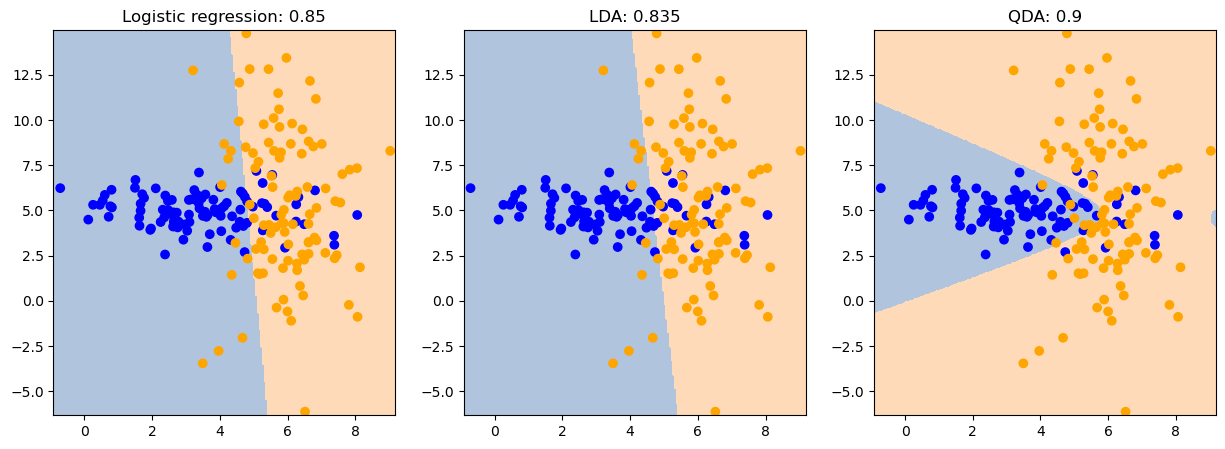

In [60]:
n_points=100
std1=[2,1]
std2=[1,4]
X,y = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)
logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y)

### Example

Example of a dataset created, and the application of Logistic Regression, with the respective graphical representation of the result.

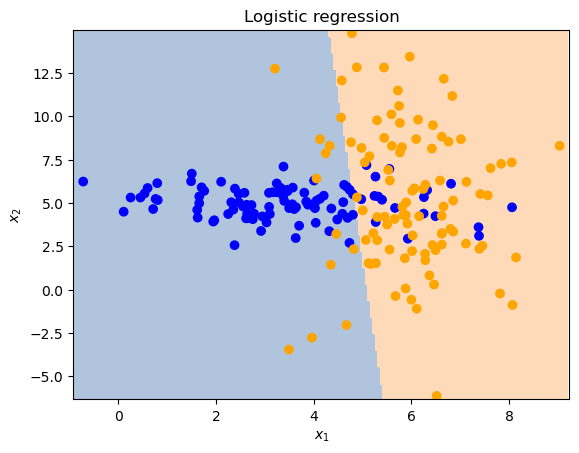

In [13]:
n_points=100
std1=[2,1]
std2=[1,4]
X,y = make_blobs(n_samples=[n_points,n_points], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[std1,std2],
                 random_state=1, shuffle=False)
cmap = colors.ListedColormap(['blue','orange'])
logr=LogisticRegression().fit(X,y)
plot_classifier_boundary(logr,X)
plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.title('Logistic regression')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

### Other Datasets

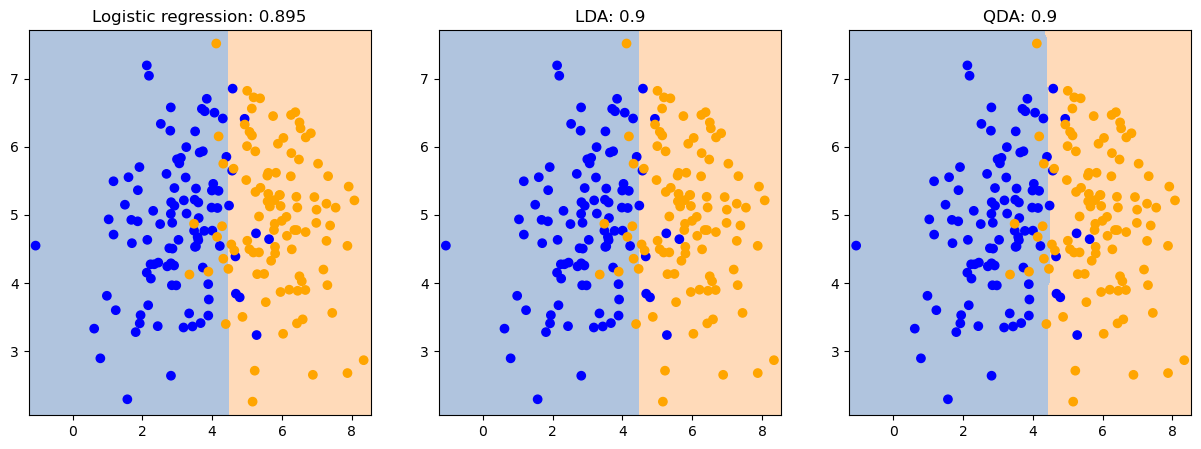

In [63]:
X,y = make_blobs(n_samples=[100,100], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[1,1],
                 random_state=None, shuffle=False)
logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y);

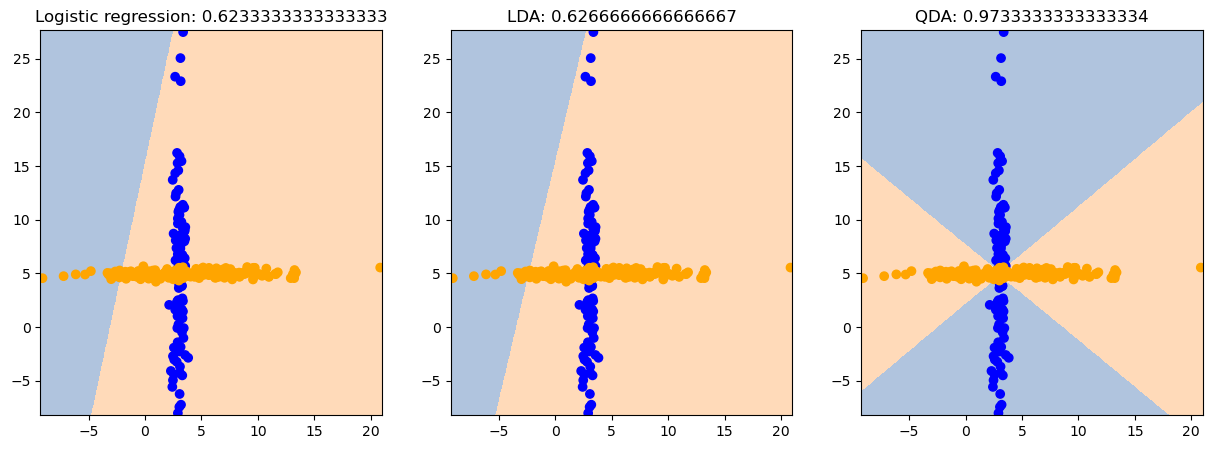

In [64]:
X,y = make_blobs(n_samples=[100,200], centers=[(3,5),(5,5)],
                 n_features=2, cluster_std=[[0.3,7],[5,0.3]],
                 random_state=None, shuffle=False)
logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y)

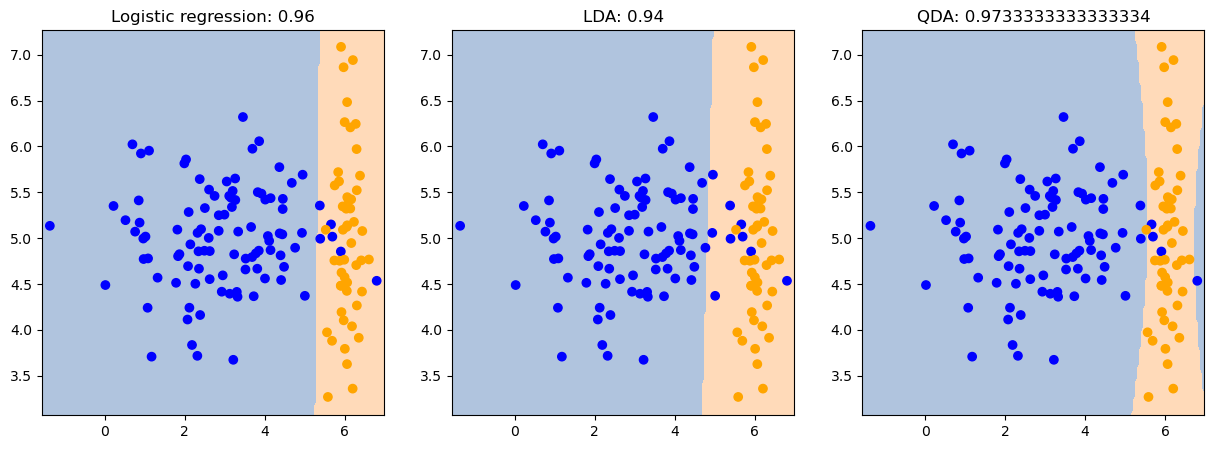

In [65]:
X,y = make_blobs(n_samples=[100,50], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[[1.5,0.5],[0.2,1]],
                 random_state=None, shuffle=False)

logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y)

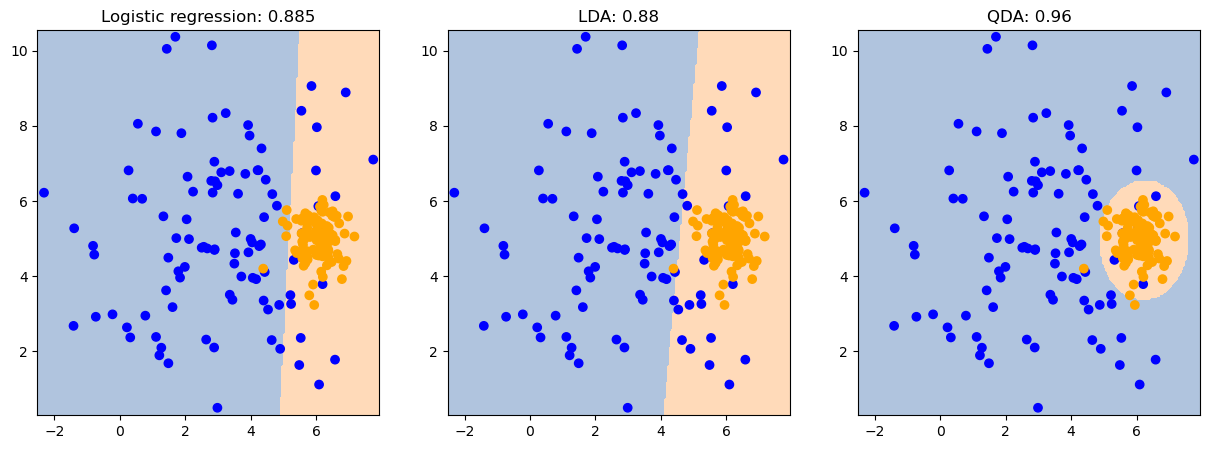

In [66]:
X,y = make_blobs(n_samples=[100,100], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[2,0.5],
                 random_state=None, shuffle=False)
logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y)

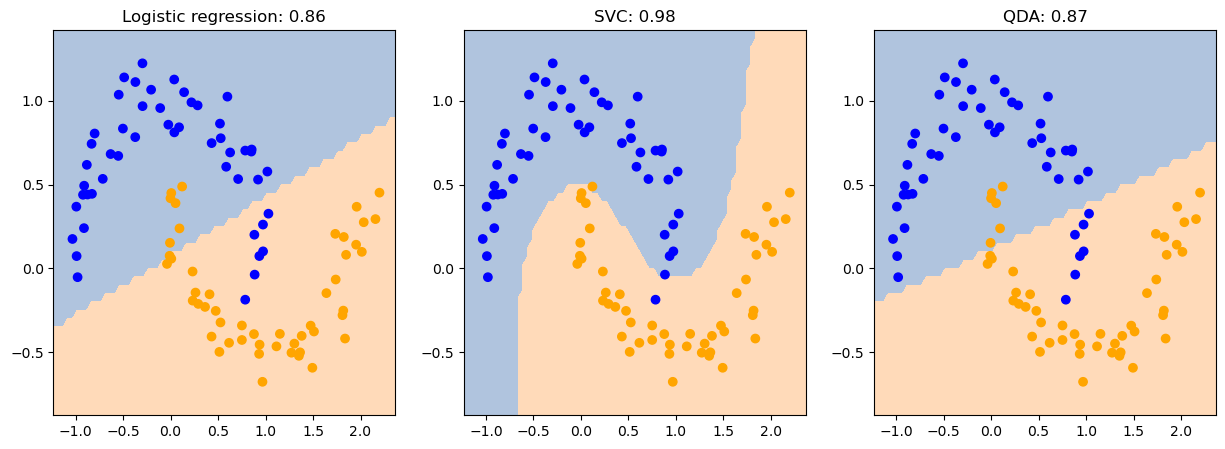

In [73]:
X,y = make_moons(n_samples=100,noise=0.1)

svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X, y)


logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,svm_classifier,qda,X,y)

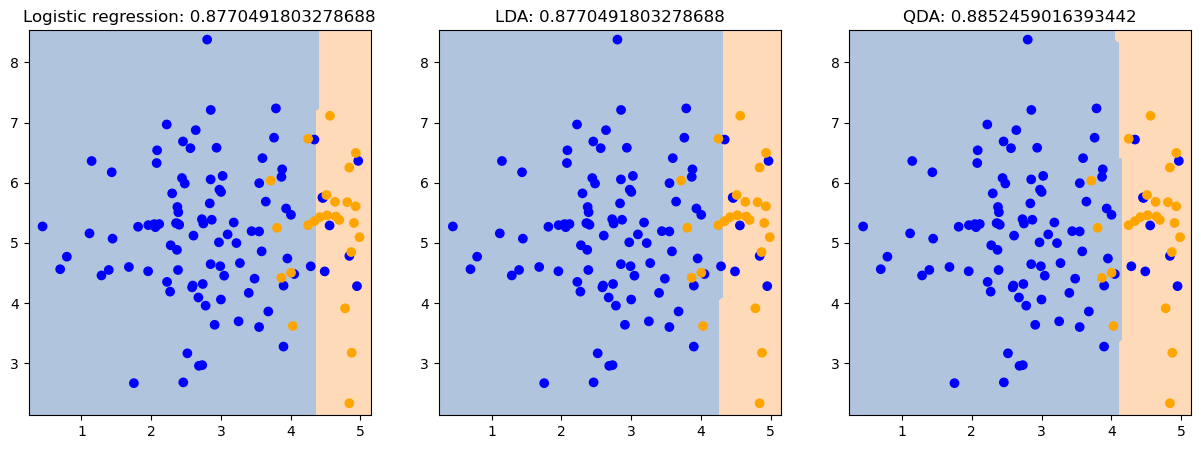

In [68]:
X,y = make_blobs(n_samples=[100,200], centers=[(3,5),(6,5)],
                 n_features=2, cluster_std=[1,1],
                 random_state=None, shuffle=False)

select=X[:,0]<5
y = y[select]
X = X[select,:]

logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,lda,qda,X,y)

## Challenge

The objective for this class is to use Logistic Regression, LDA and QDA, in each of these generated datasets, and evaluate which algorithm obtains the best accuracy, and explain why. 
(Hint: For now you can use '.score', later you can use cross validation to evaluate approaches.)

Represent graphically the decision boundaries produced by each model for all the analyzed datasets.

You can and should generate new data sets, modify existing ones, and check how the results of classification models are affected.

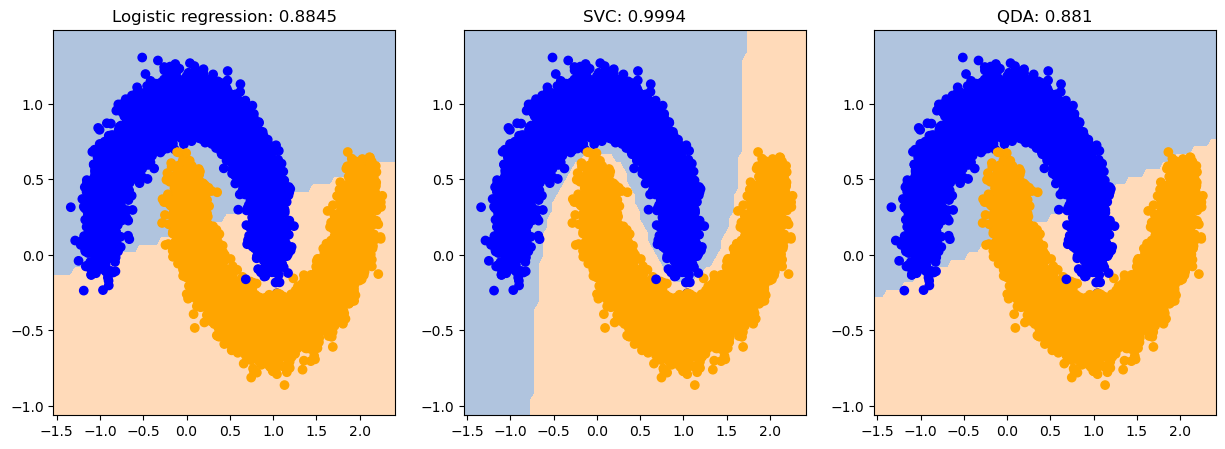

In [74]:
X,y = make_moons(n_samples=10000,noise=0.1)

svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X, y)


logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,svm_classifier,qda,X,y)

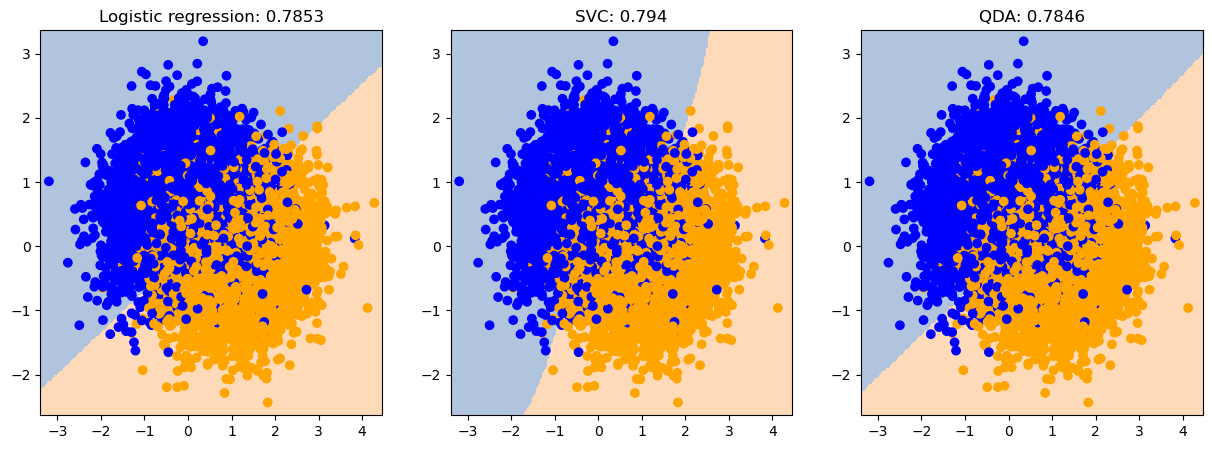

In [75]:
X,y = make_moons(n_samples=10000,noise=0.6)

svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X, y)


logr=LogisticRegression().fit(X,y)
lda=LDA().fit(X,y)
qda=QDA().fit(X,y)
subplot_classifier_boundary(logr,svm_classifier,qda,X,y)